In [38]:
# Imports das bibliotecas

import pandas as pd
import numpy as np

In [39]:
# carregando o dataset em um dataframe
url = '../data/solicitacoescredito.csv' 
df = pd.read_csv(url)

# Análise dos dados

In [40]:
df.head(10)

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.00000,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.00000,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.00000,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.00000,89000.0,2020-02-04T15:06:28
5,6,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.000000,NaN,2019-06-28T10:25:57,0,0.00,...,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,True,0.00000,38400.0,2020-02-04T15:10:46
6,7,Alexander Baker-Wells,Dr. Caroline Ali,PYOL43118620147076,16,0.000000,NaN,2011-03-02T11:27:13,0,0.00,...,12.0,156394112.0,1982.0,Acima de 17 anos,30515674.0,True,False,0.00000,18132588.0,2020-02-05T14:31:22
7,8,Jean Berry,Gregory Gould,NLUX93496216176463,4,0.350175,0.0,2007-07-02T00:00:00,102,208980.00,...,9.0,0.0,2000.0,Acima de 17 anos,120000.0,False,False,1.00000,768233.0,2020-02-05T20:05:40
8,9,Elliot Stephenson,Adrian Graham,LOVL82962402474134,43,0.245818,0.0,2006-07-10T00:00:00,27,6432.00,...,12.0,-49267738.0,2000.0,Acima de 17 anos,1000000.0,False,False,1.00000,6910219.0,2020-02-05T20:07:07
9,10,Dr. Dale Dawson,Caroline Hale,NXKJ36775578171965,24,0.000012,0.0,2011-02-24T00:00:00,0,22733.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83159,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [42]:
df.nunique()

numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

# Limpeza dos dados

In [43]:
# dropando colunas desnecessárias para o treinamento da IA
df_clean = df.drop(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'diferencaPercentualRisco', 'dashboardCorrelacao', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'periodoBalanco', 'anoFundacao'], axis=1)

In [55]:
# trocando valores NaN por valores concretos nas colunas necessárias 
df_clean['percentualProtestos'] = df_clean['percentualProtestos'].fillna(0)
df_clean['periodoDemonstrativoEmMeses'] = df_clean['periodoDemonstrativoEmMeses'].fillna(0)
df_clean['custos'] = df_clean['custos'].fillna(0)
df_clean['intervaloFundacao'] = df_clean['intervaloFundacao'].fillna(0)
df_clean['restricoes'] = df_clean['restricoes'].fillna(False)
df_clean['empresa_MeEppMei'] = df_clean['empresa_MeEppMei'].fillna(False)
df_clean['limiteEmpresaAnaliseCredito'] = df_clean['limiteEmpresaAnaliseCredito'].fillna(0)
df_clean['ativoCirculante'] = df_clean['ativoCirculante'].fillna(0)
df_clean['passivoCirculante'] = df_clean['passivoCirculante'].fillna(0)
df_clean['totalAtivo'] = df_clean['totalAtivo'].fillna(0)
df_clean['totalPatrimonioLiquido'] = df_clean['totalPatrimonioLiquido'].fillna(0)
df_clean['endividamento'] = df_clean['endividamento'].fillna(0)
df_clean['duplicatasAReceber'] = df_clean['duplicatasAReceber'].fillna(0)
df_clean['estoque'] = df_clean['estoque'].fillna(0)
df_clean['faturamentoBruto'] = df_clean['faturamentoBruto'].fillna(0)
df_clean['margemBruta'] = df_clean['margemBruta'].fillna(0)
df_clean['custos'] = df_clean['custos'].fillna(0)
df_clean['intervaloFundacao'] = df_clean['intervaloFundacao'].fillna('De 0 a 5 anos')
df_clean['capitalSocial'] = df_clean['capitalSocial'].fillna(0) 
df_clean['valorAprovado'] = df_clean['valorAprovado'].fillna(0)
df_clean['limiteEmpresaAnaliseCredito'] = df_clean['limiteEmpresaAnaliseCredito'].fillna(0)

In [56]:
# criando uma nova coluna solicitacaoDuplicada para guardar no dataset se o cnpj pediu análise de crédito mais de uma vez 

df_clean['solicitacaoDuplicada'] = df_clean.duplicated(subset=['cnpjSemTraco'], keep=False)

In [57]:
# trocando a coluna status para valores de 0 a 6 de acordo com seu valor
mapeamento = {
    'AprovadoAnalista': 0,
    'AprovadoComite': 1,
    'AguardandoAprovacao': 2,
    'DocumentacaoReprovada': 3,
    'EmAnaliseDocumentacao': 4,
    'ReprovadoAnalista': 5,
    'ReprovadoComite': 6
}

df_clean['status'] = df_clean['status'].replace(mapeamento)

# trocando a coluna definicaoRisco para valores de 0 a 6 de acordo com seu valor
mapeamento2 = {
    'De 0 a 10 % - Muito Baixo': 0,
    'De 11 a 30 % - Baixo': 1,
    'De 31 a 50 % - Médio': 2,
    'De 51 a 80 % - Alto': 3,
    'De 81 a 100 % - Muito Alto': 4
}

df_clean['definicaoRisco'] = df_clean['definicaoRisco'].replace(mapeamento2)

# trocando a coluna intervaloFundacao para valores de 0 a 6 de acordo com seu valor
mapeamento3 = {
    'De 0 a 5 anos': 0,
    'De 6 a 10 anos': 1,
    'De 11 a 16 anos': 2,
    'Acima de 17 anos': 3,
}

df_clean['intervaloFundacao'] = df_clean['intervaloFundacao'].replace(mapeamento3)

# trocando a coluna restricoes para 0 e 1 (false ou true)
mapeamento4 = {
    False: 0,
    True: 1
}

df_clean['restricoes'] = df_clean['restricoes'].replace(mapeamento4)

# trocando a coluna empresa_MeEppMei para 0 e 1 (false ou true)
df_clean['empresa_MeEppMei'] = df_clean['empresa_MeEppMei'].replace(mapeamento4)

# trocando a coluna empresa_MeEppMei para 0 e 1 (false ou true)
df_clean['solicitacaoDuplicada'] = df_clean['solicitacaoDuplicada'].replace(mapeamento4)

C:\Users\AgathaPereiraPires\AppData\Local\Temp\ipykernel_11704\2486155421.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['restricoes'] = df_clean['restricoes'].replace(mapeamento4)
C:\Users\AgathaPereiraPires\AppData\Local\Temp\ipykernel_11704\2486155421.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['empresa_MeEppMei'] = df_clean['empresa_MeEppMei'].replace(mapeamento4)
C:\Users\AgathaPereiraPires\AppData\Local\Temp\ipykernel_11704\2486155421.py:47: FutureWarning: Downcasting behavior in `replace` is

In [58]:
# normalizando as colunas necessárias para que os valores sejam encaixados entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean['maiorAtraso'] = scaler.fit_transform(df_clean[['maiorAtraso']])

df_clean['prazoMedioRecebimentoVendas'] = scaler.fit_transform(df_clean[['prazoMedioRecebimentoVendas']])

In [59]:
# trocando o valor da coluna primeiraCompra para apenas o ano da primeira compra
df_clean['primeiraCompra'] = df_clean['primeiraCompra'].astype(str)
df_clean['primeiraCompra'] = df_clean['primeiraCompra'].str[:4]
df_clean['primeiraCompra'] = pd.to_numeric(df_clean['primeiraCompra'], errors='coerce')
df_clean['primeiraCompra'] = df_clean['primeiraCompra'].fillna(0).astype(int)

In [60]:
df_clean.head(5)

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,...,margemBruta,periodoDemonstrativoEmMeses,custos,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,solicitacaoDuplicada
0,KEBE17609492220843,0.000000,0.252448,0.0,2015,0.000000,0.00,50000.0,0,1,...,0.0,12.0,0.0,3.0,90000.0,0.0,1.0,1.0,43200.0,1
1,JRBK88908250677300,0.000000,0.000000,0.0,2019,0.000000,0.00,10000.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,GCVQ28531614261293,0.003162,0.624777,0.0,2019,0.000000,0.00,20000.0,0,1,...,0.0,7.0,0.0,1.0,20000.0,0.0,1.0,1.0,4320.0,1
3,KJND32266018316396,0.015810,0.000000,0.0,2017,0.000000,0.00,25000.0,0,3,...,0.0,12.0,0.0,1.0,30000.0,0.0,1.0,0.0,5920.0,1
4,CGQN15826802440348,0.015810,0.454088,0.0,2010,0.012461,1486.95,50000.0,0,1,...,81459809.0,9.0,40680051.0,3.0,75000.0,0.0,0.0,1.0,89000.0,1


In [93]:
import tensorflow as tf;

In [100]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(['status', 'cnpjSemTraco'], axis=1)
Y = df_clean['status']
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

In [101]:
print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(7178, 28)
(1795, 28)
(7178,)
(1795,)


In [97]:
Y_treino.head()

378     0
2310    0
3635    0
547     0
2138    0
Name: status, dtype: int64

In [119]:
# Criar o modelo MLP
input_shape = X_treino.shape[1]

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(input_shape,)),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(125, activation='relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])

c:\Users\AgathaPereiraPires\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [120]:
# Compilar o modelo MLP
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
# Treinar o modelo MLP
epocas_hist = model.fit(X_treino, Y_treino, epochs=20, validation_split=0.2)

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6091 - loss: 3115983.0000 - val_accuracy: 0.8120 - val_loss: 1304252.5000
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6992 - loss: 4551922.5000 - val_accuracy: 0.7549 - val_loss: 174302.8594
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6693 - loss: 361777.6250 - val_accuracy: 0.7869 - val_loss: 162922.8125
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7046 - loss: 283808.2500 - val_accuracy: 0.8377 - val_loss: 297191.8125
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6348 - loss: 2003540.8750 - val_accuracy: 0.1407 - val_loss: 269584.0312
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6087 - loss: 167328.1875 - val_accuracy: 0.5648 - val_loss: 668763.0625
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6651 - loss: 258100.0000 - val_accuracy: 0.7772 - val_loss: 15584.2812
Epoch 8/20
180/180 ━━━━━━━━━━━━

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accuracy      20 non-null     float64
 1   loss          20 non-null     float64
 2   val_accuracy  20 non-null     float64
 3   val_loss      20 non-null     float64
dtypes: float64(4)
memory usage: 772.0 bytes


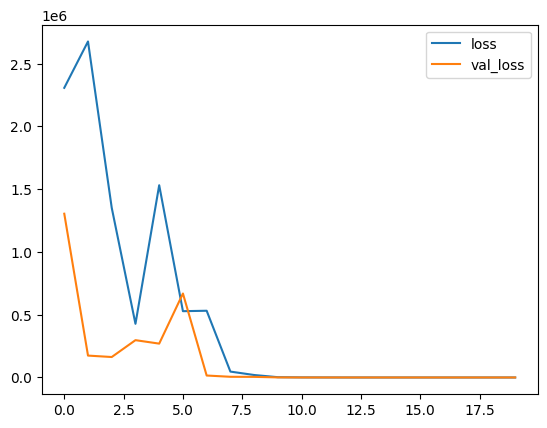

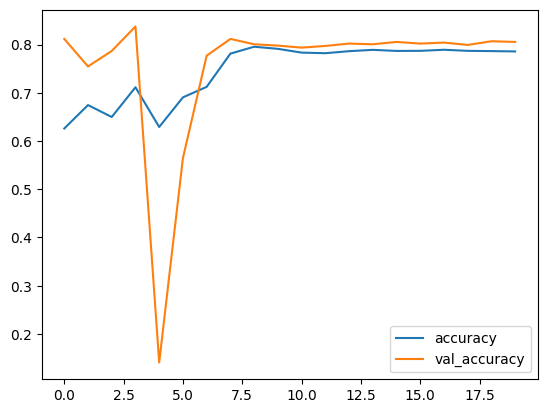

In [122]:
df_historico = pd.DataFrame(epocas_hist.history)
df_historico.info()

df_historico[['loss','val_loss']].plot();
df_historico[['accuracy','val_accuracy']].plot();

In [124]:
test_loss, test_acc = model.evaluate(X_teste, Y_teste)
print(f"Acurácia: {test_acc:.3f}, | Loss: {test_loss:.3f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 460.0603
Acurácia: 0.795, | Loss: 2581.666


In [125]:
model.save('credito_mlp_model.h5')

In [127]:
# Testando o modelo com os 20% de dados separados para teste
from tensorflow.keras.models import load_model

modelo = load_model('credito_mlp_model.h5')

loss, mae = modelo.evaluate(X_teste, Y_teste)

print(f"Loss no conjunto de teste: {loss}")
print(f"Mean Absolute Error no conjunto de teste: {mae}")

# é possivel ver que a acurácia de acerto foi em média, 80%

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 460.0603
Loss no conjunto de teste: 2581.66552734375
Mean Absolute Error no conjunto de teste: 0.7949860692024231
